In [51]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

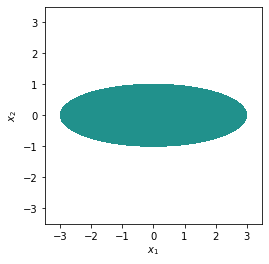

In [46]:
numPoints = 100
x1Line = np.linspace(-3.5,3.5,numPoints)
x2Line = np.linspace(-3.5,3.5,numPoints)
x1, x2 = np.meshgrid(x1Line,x2Line)
xspace = np.dstack([x1,x2])
def quadratic(Q,x):
    return np.dot(x,np.matmul(Q,x))

Q = np.array([[1/9,0],[0,1]])
y1 = np.array([[quadratic(Q,x) for x in row] for row in xspace])
ax1 = plt.contourf(x1,x2,y1,[-10,1])
plt.ylabel("$x_2$")
plt.xlabel("$x_1$")
plt.gca().set_aspect('equal', adjustable='box')

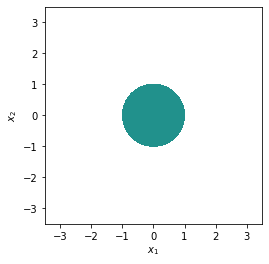

In [48]:
def affineTransform(A,x):
    return np.matmul(A,x)

A = np.array([[3,0],[0,1]])
Q = np.array([[1/9,0],[0,1]])
y2 = np.array([[quadratic(Q,affineTransform(A,x)) for x in row] for row in xspace])
ax2 = plt.contourf(x1,x2,y2,[-10,1])
plt.ylabel("$x_2$")
plt.xlabel("$x_1$")
plt.gca().set_aspect('equal', adjustable='box')

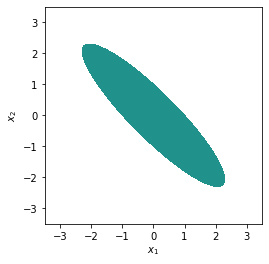

In [49]:

Q = np.array([[1,0.9],[0.9,1]])
y3 = np.array([[quadratic(Q,x) for x in row] for row in xspace])
ax3 = plt.contourf(x1,x2,y3,[-10,1])
plt.ylabel("$x_2$")
plt.xlabel("$x_1$")
plt.gca().set_aspect('equal', adjustable='box')

In [72]:
print(Q)
results = la.eig(Q)
print("eigenvalues: ",results[0])
print("eigenvectors: \n",results[1])


[[1.  0.9]
 [0.9 1. ]]
eigenvalues:  [1.9+0.j 0.1+0.j]
eigenvectors: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


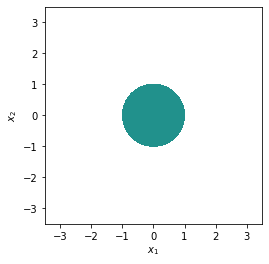

In [88]:
B = la.sqrtm(Q)
A = np.matmul(np.linalg.inv(B),np.array([[1,0],[0,1]]))


y4 = np.array([[quadratic(Q,affineTransform(A,x)) for x in row] for row in xspace])
ax4 = plt.contourf(x1,x2,y4,[-10,1])
plt.ylabel("$x_2$")
plt.xlabel("$x_1$")
plt.gca().set_aspect('equal', adjustable='box')

In [131]:
# Lasso
n = 50
d = 200
nonZero = d-5
np.random.seed(0)

# Generate xStar
xStar = (np.random.rand(d)-0.5)*20
toZero = np.random.choice(np.arange(d),nonZero,replace=False)
xStar[toZero]=0

# Generate A
A = np.random.normal(0,1,(n,d))

# Generate e
e = np.random.normal(0,.1,n)

# Calculate y
y = np.matmul(A,xStar)+e

# Set lambda
Lambda = 1

def residual(x):
    return np.matmul(A,x)-y

def f(x):
    r = residual(x)
    return 0.5*np.matmul(r.T, r)+Lambda*np.linalg.norm(x,1)

def convergence(x):
    return np.linalg.norm(x-xStar,2)

In [137]:
# Subgradient
epochs = 2000

def subgrad(x):
    r = residual(x)
    g = np.matmul(A.T,r)+Lambda*np.sign(x)
    return g


#Generate X:
np.random.seed(5)
x = (np.random.rand(d)-0.5)*20
xbest = x
fbest = f(xbest)
convergenceListSubgrad=[]
for i in range(epochs):
    eta = 1/(i+1)
    convergenceListSubgrad.append(convergence(x))
    xtemp = x - eta*subgrad(x)
    ftemp = f(xtemp)
    if ftemp<fbest:
        x = xtemp
        xbest = x
        fbest = ftemp
    

In [139]:
# proximal
epochs = 2000
eta = 1/(np.linalg.norm(np.matmul(A.T,A),2)+1)
def prox(x):
    def thresholdCoord(bi):
        if bi>eta*Lambda:
            return bi-eta*Lambda
        elif bi<eta*Lambda:
            return bi+eta*Lambda
        else:
            return 0
    def threshold(b):
        return np.array([thresholdCoord(bi) for bi in b])
    return threshold(x-eta*np.matmul(A.T,residual(x)))


#Generate X:
np.random.seed(5)
x = (np.random.rand(d)-0.5)*20

convergenceListProx=[]
for i in range(epochs):
    convergenceListProx.append(convergence(x))
    x = prox(x)

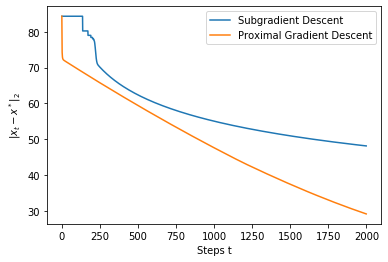

In [143]:
t = np.arange(epochs)
plt.plot(t,convergenceListSubgrad, label="Subgradient Descent")
plt.plot(t,convergenceListProx, label="Proximal Gradient Descent")
plt.xlabel('Steps t')
plt.ylabel(r'$\|x_t-x^*\|_2$')
plt.legend()
plt.show()